In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import gensim

C:\Users\Admin\Anaconda3\envs\tf15\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
train = pd.read_csv('C://Users//Admin//Documents//Lazy Programmer//NLP//r52-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('C://Users//Admin//Documents//Lazy Programmer//NLP//r52-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']

In [5]:
print(test.content)

0       asian exporters fear damage from u s japan rif...
1       china daily says vermin eat pct grain stocks a...
2       australian foreign ship ban ends but nsw ports...
3       western mining to open new gold mine in austra...
4       sumitomo bank aims at quick recovery from merg...
5       subroto says indonesia supports tin pact exten...
6       china industrial output rises in first quarter...
7       amatil proposes two for five bonus share issue...
8       bowater pretax profits rise mln stg shr p vs p...
9       cra sold forrest gold for mln dlrs whim creek ...
10      german industrial employment seen stagnating t...
11      bowater industries profit exceed expectations ...
12      citibank norway unit loses six mln crowns in c...
13      vieille montagne says conditions unfavourable ...
14      vieille montagne reports loss dividend nil yea...
15      ec mainly for tin extension no u k stand taken...
16      japan given little hope of avoiding u s sancti...
17      thai z

In [6]:
from gensim.models import word2vec

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('punkt')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def sentence_to_wordlist(sentence, remove_stopwords=False):
    # 1. Remove non-letters
    sentence_text = re.sub(r'[^\w\s]','', sentence)
    # 2. Convert words to lower case and split them
    words = sentence_text.lower().split()
    # 3. Return a list of words
    return(words)

In [11]:
def oped_to_sentences(oped, tokenizer, remove_stopwords=False ):
    try:
        # 1. Use the NLTK tokenizer to split the text into sentences
        raw_sentences = tokenizer.tokenize(oped.strip())
        # 2. Loop over each sentence
        sentences = []
        for raw_sentence in raw_sentences:
            # If a sentence is empty, skip it
            if len(raw_sentence) > 0:
                # Otherwise, call sentence_to_wordlist to get a list of words
                sentences.append(sentence_to_wordlist(raw_sentence))
        # 3. Return the list of sentences (each sentence is a list of words, so this returns a list of lists)
        len(sentences)
        return sentences
    except:
        print('nope')

In [ ]:
""""nyt_opeds = train['content'].tolist()
sentences = []

for i in range(0,len(nyt_opeds)):
    #try:
        # Need to first change "./." to "." so that sentences parse correctly
    oped = nyt_opeds[i].replace("/.", '')
        # Now apply functions
    sentences += oped_to_sentences(oped, tokenizer)
    #except:
        #print('no!')"""

In [12]:
nyt_opeds = train['content'].tolist()
sentences = []

for i in range(0,len(nyt_opeds)):
    try:
        # Need to first change "./." to "." so that sentences parse correctly
        oped = nyt_opeds[i].replace("/.", '')
        # Now apply functions
        sentences += oped_to_sentences(oped, tokenizer)
    except:
        print('no!')

In [14]:
print("There are " + str(len(sentences)) + " sentences in our corpus")

There are 6532 sentences in our corpus


In [13]:
model = word2vec.Word2Vec(sentences, size=200)

2018-12-02 16:00:21,215 : INFO : collecting all words and their counts
2018-12-02 16:00:21,216 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-02 16:00:21,341 : INFO : collected 22274 word types from a corpus of 733646 raw words and 6532 sentences
2018-12-02 16:00:21,342 : INFO : Loading a fresh vocabulary
2018-12-02 16:00:21,364 : INFO : effective_min_count=5 retains 7596 unique words (34% of original 22274, drops 14678)
2018-12-02 16:00:21,365 : INFO : effective_min_count=5 leaves 708364 word corpus (96% of original 733646, drops 25282)
2018-12-02 16:00:21,389 : INFO : deleting the raw counts dictionary of 22274 items
2018-12-02 16:00:21,394 : INFO : sample=0.001 downsamples 47 most-common words
2018-12-02 16:00:21,395 : INFO : downsampling leaves estimated 533220 word corpus (75.3% of prior 708364)
2018-12-02 16:00:21,420 : INFO : estimated required memory for 7596 words and 200 dimensions: 15951600 bytes
2018-12-02 16:00:21,421 : INFO : resetting 

In [15]:
model.most_similar(['citibank'])

C:\Users\Admin\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-12-02 16:00:26,375 : INFO : precomputing L2-norms of word weight vectors
C:\Users\Admin\Anaconda3\envs\tf15\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chase', 0.9613120555877686),
 ('scotia', 0.9538564085960388),
 ('manhattan', 0.9373461008071899),
 ('nova', 0.9370524883270264),
 ('creek', 0.9318338632583618),
 ('homes', 0.9297516942024231),
 ('lifts', 0.9293556213378906),
 ('mhc', 0.9282734394073486),
 ('fidelity', 0.9269530773162842),
 ('irish', 0.9259854555130005)]

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Admin\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


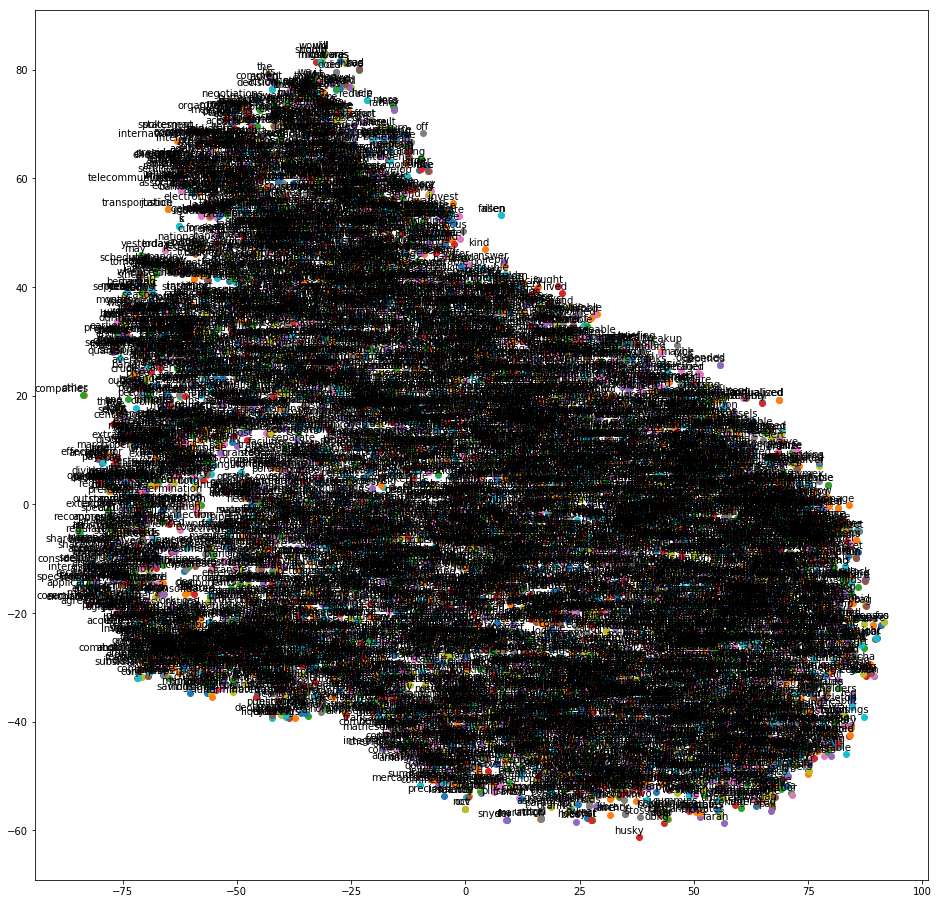

In [18]:
tsne_plot(model)